# Hello, World!
Most basic of all machine learning problems: MNIST handwritten digit classification.

## Import Packages

In [12]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Tensorflow and Keras
import tensorflow as tf

# Helper libraries
import numpy as np

# Vizualization libraries
import matplotlib.pyplot as plt
import seaborn as sn    # Heatmap for confusion matrix

## Import Data

In [13]:
mnist = tf.keras.datasets.mnist

### Load Training and Testing Sets

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Explore the Data

(60000, 28, 28)
0
255


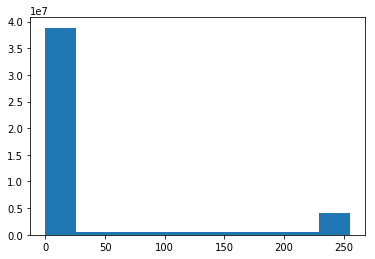

5


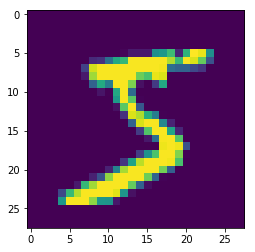

(10000, 28, 28)
0
255


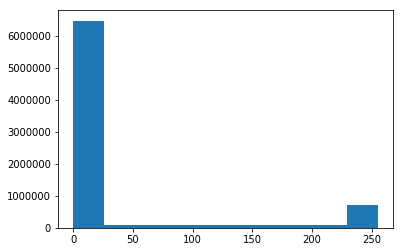

7


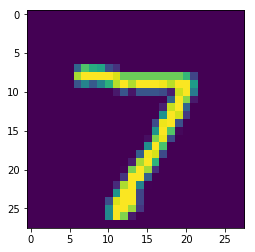

In [15]:
print( x_train.shape )
print( np.min( x_train ) )
print( np.max( x_train ) )

_ = plt.hist(x_train.ravel())
plt.show()
%matplotlib inline 
plt.imshow(x_train[0,:,:], interpolation='nearest')
print( y_train[0] )
plt.show()

print( x_test.shape )
print( np.min( x_test ) )
print( np.max( x_test ) )

_ = plt.hist(x_test.ravel())
plt.show()
%matplotlib inline 
plt.imshow(x_test[0,:,:], interpolation='nearest')
print( y_test[0] )
plt.show()

### Normalize Data

In [16]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## Build Model

In [17]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),    # Flatten the 28x28 images into a single input column
            tf.keras.layers.Dense(128, activation='relu'),    # First hidden layer of 128 nodes
            tf.keras.layers.Dropout(0.2),                     # Dropout regularization
            tf.keras.layers.Dense(10, activation='softmax')]) # Output softmax layer

## Select Optimization Function

In [18]:
model.compile(optimizer='adam',                          # Optimizer favored over standard gradient decent
              loss='sparse_categorical_crossentropy',    # Standard loss for multiclass classification
              metrics=['accuracy'])                      # Typical metric for classification performance

## Train Model

In [19]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2994 - accuracy: 0.9124
Epoch 2/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1434 - accuracy: 0.9573
Epoch 3/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1066 - accuracy: 0.9671
Epoch 4/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0891 - accuracy: 0.9723
Epoch 5/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0749 - accuracy: 0.9764
Epoch 6/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0665 - accuracy: 0.9793
Epoch 7/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0570 - accuracy: 0.9817
Epoch 8/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0527 - accuracy: 0.9827s - loss: 0.0526 - accuracy: 0. - ETA: 0s - loss: 0.0
Epoch 9/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0470 - a

## Evaluate Model Performance on Test Set

10000/10000 [==============================] - 0s 44us/sample - loss: 0.0716 - accuracy: 0.9795


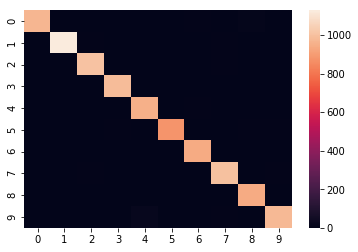

In [20]:
model.evaluate(x_test, y_test)
confusion = tf.math.confusion_matrix( tf.argmax(input=model.predict(x_test), axis=1), y_test )
sn.heatmap( confusion )